 # Market Basket Analysis for E-Commerce using Apriori Algorithm
 
Market Basket Analysis, is a unique machine language that offers deep insights into purchasing algorithms.the algorithm identifies relationships between items and combinations of items that are frequently bought together. Market basket analysis to encourage customers to spend more.


# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import libaries


Importing the dataset and carrying out some basic data exploration 

In [2]:
MBA = pd.read_csv(r'C:\Users\Asus\Downloads\Market Basket Analysis - Groceries_dataset.csv')


MBA

#import dataset to be analyzed all through the project

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
MBA.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

# Exploratory Data Analysis
Here, we will be carrying out all necessary corrections and modifications on the dataset.

In [4]:
MBA=MBA.rename(columns={'Member_number':'customer_id',
                        'Date':'date',
                        'itemDescription':'item_description'})

#Cleaning the column header accordingly
MBA

,customer_id,date,item_description
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
MBA.columns

#Verifying if the rename changes are in place

Index(['customer_id', 'date', 'item_description'], dtype='object')

In [6]:
MBA.copy=MBA

#duplicating the dataset, for avoidance of data loss uncertaintity

In [7]:
MBA.info()

#Checking datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       38765 non-null  int64 
 1   date              38765 non-null  object
 2   item_description  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
MBA['date'] = pd.to_datetime(MBA['date'], format='%d-%m-%Y')
MBA['customer_id'] = MBA['customer_id'].astype(str)

#changing datatype in the date column to datetime and customer_id column to string

MBA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       38765 non-null  object        
 1   date              38765 non-null  datetime64[ns]
 2   item_description  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [9]:
MBA['date']

0       2015-07-21
1       2015-01-05
2       2015-09-19
3       2015-12-12
4       2015-02-01
           ...    
38760   2014-10-08
38761   2014-02-23
38762   2014-04-16
38763   2014-12-03
38764   2014-12-26
Name: date, Length: 38765, dtype: datetime64[ns]

In [10]:
#creating new columns -month and year columns respectively for better visualization
MBA['month'] = MBA['date'].dt.month
MBA['year'] = MBA['date'].dt.year

MBA


,customer_id,date,item_description,month,year
0,1808,2015-07-21,tropical fruit,7,2015
1,2552,2015-01-05,whole milk,1,2015
2,2300,2015-09-19,pip fruit,9,2015
3,1187,2015-12-12,other vegetables,12,2015
4,3037,2015-02-01,whole milk,2,2015
...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,10,2014
38761,2022,2014-02-23,candy,2,2014
38762,1097,2014-04-16,cake bar,4,2014
38763,1510,2014-12-03,fruit/vegetable juice,12,2014


In [11]:
#replacing the values in the month column with categorical variables
MBA['month'] = MBA['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], 
 ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov", "Dec"])

MBA

,customer_id,date,item_description,month,year
0,1808,2015-07-21,tropical fruit,Jul,2015
1,2552,2015-01-05,whole milk,Jan,2015
2,2300,2015-09-19,pip fruit,Sep,2015
3,1187,2015-12-12,other vegetables,Dec,2015
4,3037,2015-02-01,whole milk,Feb,2015
...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Oct,2014
38761,2022,2014-02-23,candy,Feb,2014
38762,1097,2014-04-16,cake bar,Apr,2014
38763,1510,2014-12-03,fruit/vegetable juice,Dec,2014


In [12]:
MBA['uniqueTransaction'] = MBA['customer_id'].astype(str)+'_'+MBA['date'].astype(str)
#creating a unique transaction column,merging customer_id and date column to create a unique transaction id
MBA.head()

,customer_id,date,item_description,month,year,uniqueTransaction
0,1808,2015-07-21,tropical fruit,Jul,2015,1808_2015-07-21
1,2552,2015-01-05,whole milk,Jan,2015,2552_2015-01-05
2,2300,2015-09-19,pip fruit,Sep,2015,2300_2015-09-19
3,1187,2015-12-12,other vegetables,Dec,2015,1187_2015-12-12
4,3037,2015-02-01,whole milk,Feb,2015,3037_2015-02-01


In [13]:
oneCustomerCheck = MBA[MBA['customer_id'] == '3037'].sort_values('month')
oneCustomerCheck.head(20)



,customer_id,date,item_description,month,year,uniqueTransaction
4,3037,2015-02-01,whole milk,Feb,2015,3037_2015-02-01
1232,3037,2015-02-23,cling film/bags,Feb,2015,3037_2015-02-23
16153,3037,2015-02-01,other vegetables,Feb,2015,3037_2015-02-01
17381,3037,2015-02-23,ham,Feb,2015,3037_2015-02-23
36092,3037,2015-02-01,white bread,Feb,2015,3037_2015-02-01


# Market Basket Analysis (MBA)

The Apriori algorithm is the most common technique for performing MBA. Using asscociation rule mining, which is a rule-based process used to identify correlations between items purchased by users. Made up of three(3) components:

#### Support: 
used to access the overall popularity of a given product. Can be calculated as
Support(item considered) = Transactions comprising the item(A) / Total transactions

N/B: High support indicates that the item is present in most purchases and marketers should focus on it more.

##### Confidence: 
tells us the likelihood of different purchase combination. Can be calculated as
Confidence = Transactions comprising items(A&B) / Transaction comprising item(A)

##### Lift:
refers to the increase in the ratio of the sale of item(B) when you sell item(A). Can be calculated as

Lift = Confidence / Support 

In [14]:
# Create a cross-tabulation ('basket') to represent the frequency of items in each unique transaction

MBA_one = pd.crosstab(MBA['uniqueTransaction'], MBA['item_description']) 

MBA_one

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = MBA_one.applymap(encode)

In [16]:
import mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False)

rules.head(20)

C:\Users\Asus\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-2.284679e-04,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-2.284679e-04,0.996168,-0.185312
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-4.726578e-04,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-4.726578e-04,0.975443,-0.184234
4,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-1.544901e-04,0.997391,-0.126418
5,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-1.544901e-04,0.992371,-0.121998
6,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
7,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
8,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
9,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559


Here, the “antecedents” and “consequents” columns show items that are frequently purchased together.

In this dataset, the first row of the dataset tells us that if a person were to buy bottled water, then they are also likely to purchase UHT-milk.

To get the most frequent item combinations in the entire dataset, let’s sort the dataset by support, confidence, and lift:

In [17]:
#getting the most frequently item combinations, sort the dataset by support, confidence and lift
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
648,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
649,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
625,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
624,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


The resulting table shows that the five most popular product combinations that are frequently bought together are:

Rolls and milk
Yogurt and milk
Sausages and milk
Soda and vegetables
Rolls and Yogurt

In [18]:
#most purchased item and least purchased items

top_products = MBA['item_description'].value_counts().head(10)
bottom_products = MBA['item_description'].value_counts().tail(10)

print("Top 10 products frequently purchased:")
print(top_products)

print("\nBottom 10 products not frequently purchased")
print(bottom_products)

Top 10 products frequently purchased:
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: item_description, dtype: int64

Bottom 10 products not frequently purchased
whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: item_description, dtype: int64


# Visualization

Here, we will carry out necessary visualization to explore the trends and patterns in our dataset.

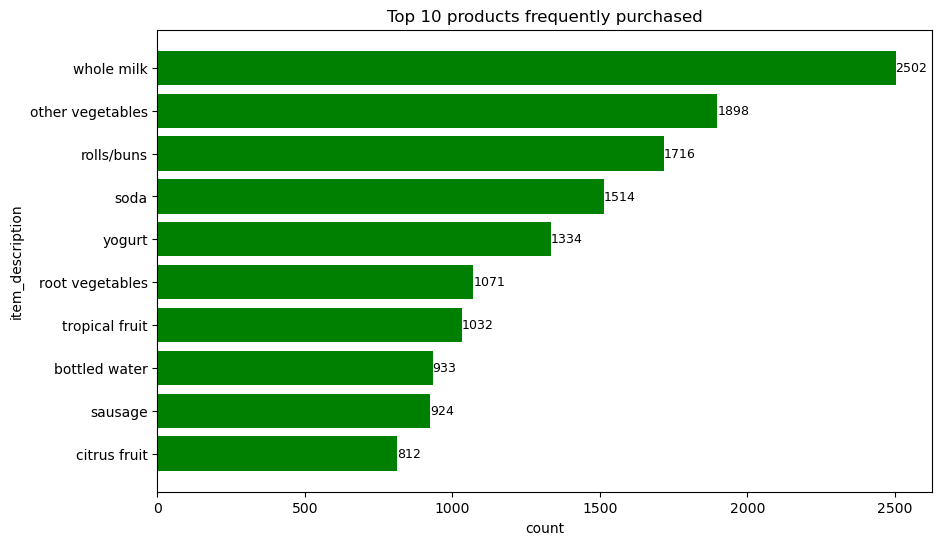

In [19]:
product_count = MBA['item_description'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_products.index, product_count, color='green')
plt.ylabel('item_description') 
plt.xlabel('count')
plt.title('Top 10 products frequently purchased')
plt.gca().invert_yaxis()  #invert the y_axis to display the top products at the top

for item_description, product_count in zip(top_products.index, product_count):
    plt.annotate(f'{product_count}', (product_count, item_description), fontsize=9, va='center')

plt.show()

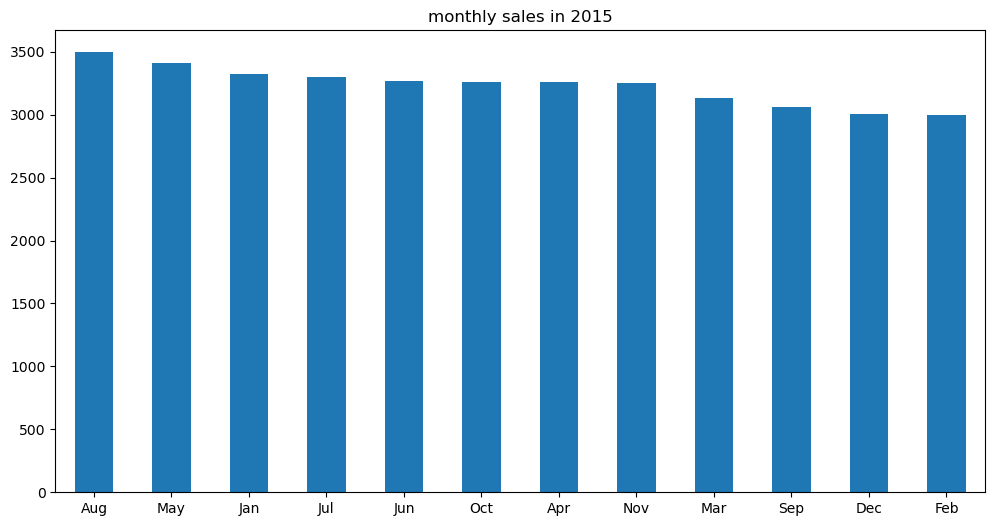

In [20]:
month_count2015 = MBA['month'].value_counts()

plt.figure(figsize=(12,6))
month_count2015.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('monthly sales in 2015');

In [22]:
firstyear = MBA[MBA['year']==2014]

firstyear

,customer_id,date,item_description,month,year,uniqueTransaction
8696,1664,2014-10-01,rolls/buns,Oct,2014,1664_2014-10-01
8697,3942,2014-12-16,hamburger meat,Dec,2014,3942_2014-12-16
8698,2638,2014-10-10,turkey,Oct,2014,2638_2014-10-10
8699,4735,2014-10-10,specialty chocolate,Oct,2014,4735_2014-10-10
8700,3745,2014-12-09,frankfurter,Dec,2014,3745_2014-12-09
...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,Oct,2014,4471_2014-10-08
38761,2022,2014-02-23,candy,Feb,2014,2022_2014-02-23
38762,1097,2014-04-16,cake bar,Apr,2014,1097_2014-04-16
38763,1510,2014-12-03,fruit/vegetable juice,Dec,2014,1510_2014-12-03


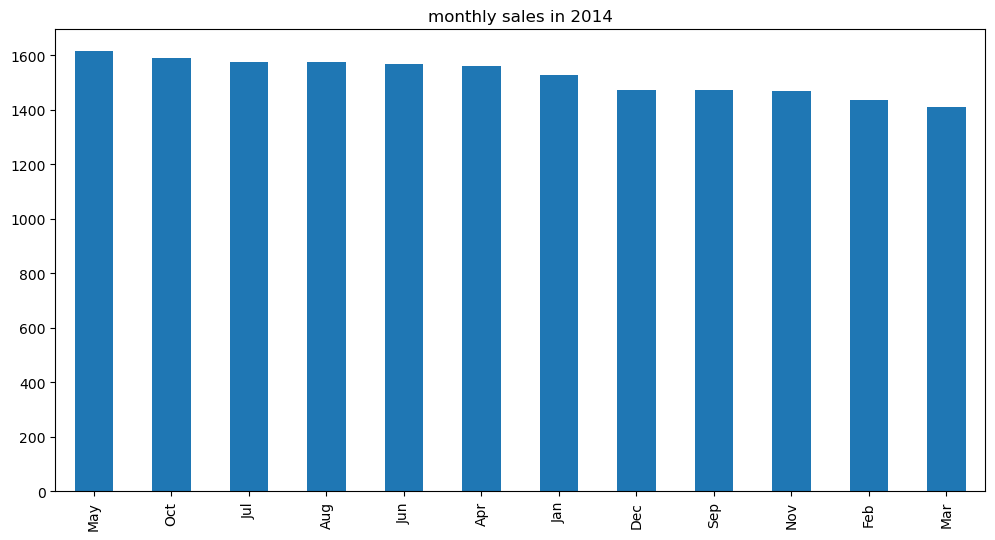

In [23]:
month_count2014 = firstyear['month'].value_counts()

plt.figure(figsize=(12,6))
month_count2014.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('monthly sales in 2014');

# HeatMAP Visualization

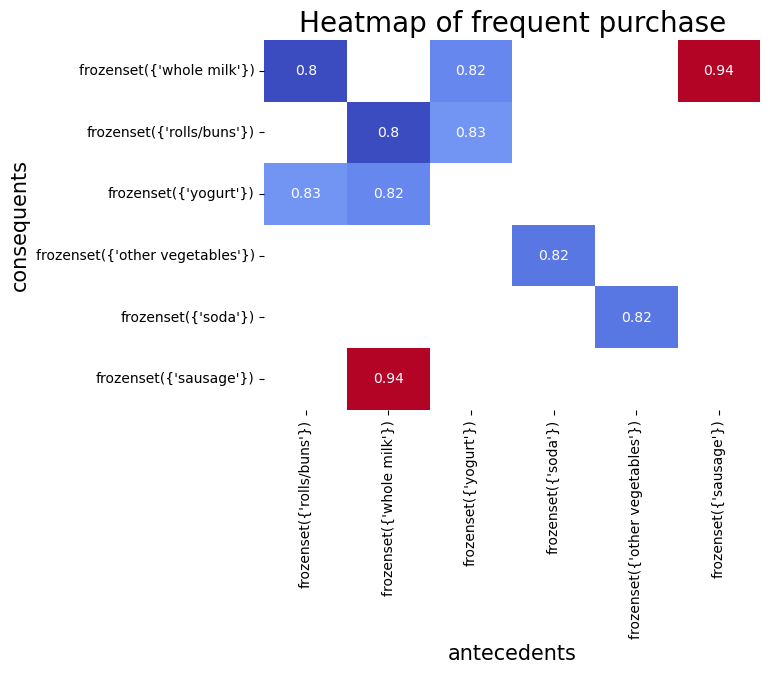

In [29]:
support_table = rules.sort_values(["support", "confidence", "lift"], axis = 0, ascending = False).head(10).pivot(index = 'consequents', columns = 'antecedents', values='lift')

sns.heatmap(support_table, annot = True, cmap='coolwarm', cbar=False)
plt.title('Heatmap of frequent purchase', fontsize= 20)
plt.xlabel('antecedents', fontsize= 15)
plt.ylabel('consequents', fontsize= 15)
plt.show()


# conclusion

The most frequently bought grocries are Whole milk and Sausage.
Rolls/buns and Youghurt,
Whole milk and Yoghurt
Soda and vegetables

I would recommend that these set of products be never be out of stock and should be made available at all times through every season